<a href="https://colab.research.google.com/github/JoonJ14/hello-world/blob/main/BME_312_HW6_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 6 Solutions**

#### Note: to clear the environment in R, do:
`rm(list=ls(all=TRUE))`

## **0. Explain the difference between hypothesis testing and confidence intervals?**

## **1. A cellphone manufacturer claims the mean life of their “super-Li” battery is 500 days with a standard deviation of 25 days. You bought this cellphone and now you think this claim is inflated. As a conscious customer, you would like to test your belief and prove this manufacturer wrong, so that you and others can get part of the money spent on this device back.**

### **a. What is your variable?**
$X: $ cell phone battery life

### **b. What statistic will you use to study this variable?**
$t$-statistic.

### **c. What is your hypothesis? What is the null hypothesis?**
$H_0: \mu = \mu_0$

$H_1: \mu < \mu_0$

### **d. State the assumptions for your hypothesis test.**
That the variable is normally distributed.

### **e. What kind of a sample will you collect for an un-biased design?**
Random.

### **f. What will be your sample size?**
This requires a power calculation and depends on our specific hypothesis about the actual mean battery life:

$Power = 1 - \beta = \Phi(z_{\alpha} + \frac{\sqrt{n}(\mu_0 - \mu_1)}{\sigma})$

For $\alpha = 0.05$, we can plot how power changes as a function of both the sample size $n$ and the magnitude of the difference between the means, that is, $|\mu_0 - \mu_1|$. In the plot below, green is low power and red-gray are high power.

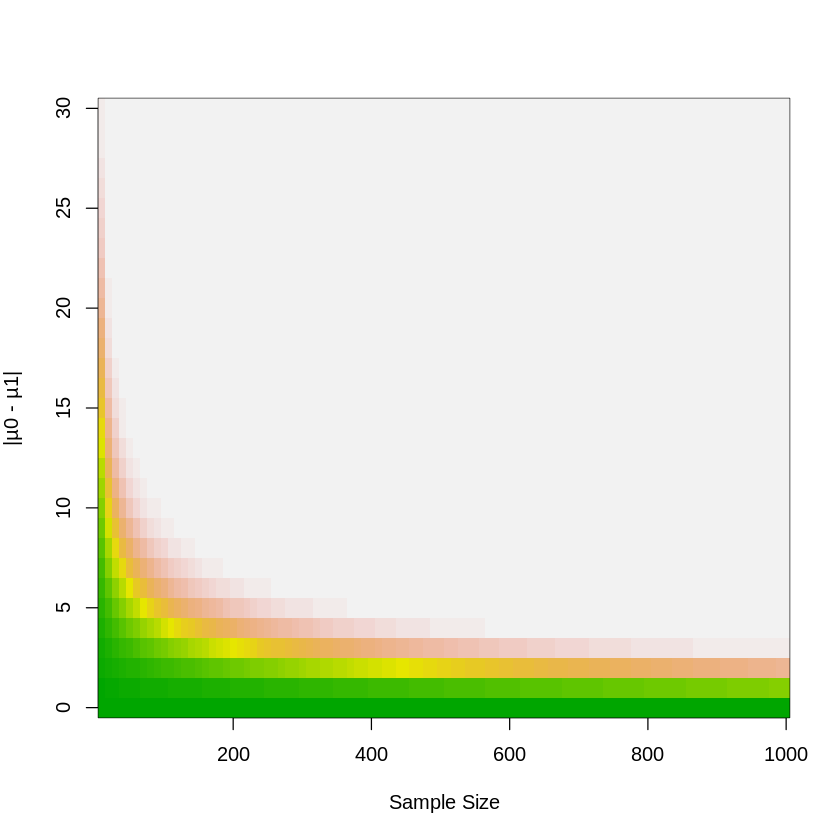

In [ ]:
require(grDevices)
mu0 <- 500
sigma <- 25
pow <- matrix(, nrow=100, ncol=31)
alpha <- 0.05
z <- qnorm(alpha)
for (n in seq(10, 1000, 10)){
  for (mu1 in 500:470){
    pow[n/10, 501-mu1] = pnorm(z + sqrt(n)*(mu0-mu1)/sigma)
  }
}
x <- seq(10, 1000, 10)
y <- mu0 - (500:470)
image(x, y, pow, col=terrain.colors(64), ylab=expression(paste('|', mu, '0 - ', mu, '1|')), xlab='Sample Size')

## **2. Power and probability of type II error calculation: Consider two populations with $n = 50$: $\mathcal{N_1}(50, 100)$ and $\mathcal{N_2}(55, 100)$. Following steps will guide you to calculate type I, type II errors and power of a test.**

### **a. Let $X1$ denote the cutoff point for accepting $H0: \mu = 50$. For $\alpha = 0.05$, find the value of $X1$.** 
Use the $z$-table given normal and population standard deviation. Values of $X$ greater than $X1$ will occur $5$% of the time when $H0$ is true.

We first specify the hypotheses:

$H_0: \mu = 50$ and $H_1: \mu > 55$

Then, we note that that $\sigma (= \sqrt{100} = 10)$ is **_known_**.

For $\alpha = 0.05$ and our $H_1$ specifying that $\mu > 55$, our $Z$-value of interest is $Z_{1-\alpha} = Z_{0.95} = 1.645$. 

Working backwards: $Z = \frac{X_1 - \mu}{\frac{\sigma}{\sqrt{n}}}$

$\therefore X_1 = \frac{\sigma}{\sqrt{n}} Z + \mu = \frac{10}{\sqrt{50}} \times 1.645 + 50 = 52.33$

### **b. What if $H0$ were to be false and $H1: \mu = 55$ were to be true? Now any value below the $X1$ value that you calculated in (a) would be viewed as supporting $H0$. So find $P(X < X1)$.**
Again, use the $Z$-table. What does this probability suggest? This probability is $\beta$. What is the power $(1 - \beta)$?

$P(X < X_1) = P(X < 52.33) = P(Z < \frac{52.33-55}{\frac{10}{\sqrt{50}}}) = P(Z < -1.89) = \Phi(-1.89) = 0.03$

$\therefore Power = 1 - 0.03 = 0.97$

### **c. Repeat the same steps for $\alpha = 0.01$ and $\alpha = 0.001$.**

$\alpha = 0.01$:

$Z_{1-\alpha} = Z_{0.99} = 2.33$

$X_1 = \frac{\sigma}{\sqrt{n}} Z + \mu = \frac{10}{\sqrt{50}} \times 2.33 + 50 = 53.29$

$Power = 1 - \beta = 1 - P(X < X_1) = 1 - P(X < 53.29) = 1 - P(Z < \frac{53.29-55}{\frac{10}{\sqrt{50}}}) = 1 - P(Z < -1.21) = 1 - \Phi(-1.21) = 0.89$

<br>

$\alpha = 0.001$:

$Z_{1-\alpha} = Z_{0.999} = 3.09$

$X_1 = \frac{\sigma}{\sqrt{n}} Z + \mu = \frac{10}{\sqrt{50}} \times 3.09 + 50 = 54.37$

$Power = 1 - \beta = 1 - P(X < X_1) = 1 - P(X < 54.37) = 1 - P(Z < \frac{54.37-55}{\frac{10}{\sqrt{50}}}) = 1 - P(Z < -0.45) = 1 - \Phi(-0.45) = 0.67$

## **3. Assume that $X$ is normally distributed with unknown mean $\mu$ and standard deviation $\sigma = 16$. Let’s set the probability of committing a Type I error to be $\alpha = 0.05$. Let’s check $H0: \mu = 100$ against the alternative hypothesis that $H1: \mu > 100$. If $n = 24$, what is the power of the hypothesis test if the true population mean is:**

### **a. $\mu_1 = 108$?**
$Power = \Phi(z_{\alpha} + \frac{\sqrt{n}|\mu_0-\mu_1|}{\sigma}) = \Phi(z_{0.05} + \frac{\sqrt{24} \times 8}{16}) = \Phi(-1.64 + 2.45) = \Phi(0.80) = 0.789$

### **b. $\mu_1 = 112$?**
$Power = \Phi(z_{\alpha} + \frac{\sqrt{n}|\mu_0-\mu_1|}{\sigma}) = \Phi(z_{0.05} + \frac{\sqrt{24} \times 12}{16}) = \Phi(-1.64 + 3.67) = \Phi(2.03) = 0.979$

### **c. $\mu_1 = 116$?**
$Power = \Phi(z_{\alpha} + \frac{\sqrt{n}|\mu_0-\mu_1|}{\sigma}) = \Phi(z_{0.05} + \frac{\sqrt{24} \times 16}{16}) = \Phi(-1.64 + 4.90) = \Phi(3.25) = 0.999$

### **d. $\mu_1 = 108$ with $\alpha = 0.01$?**
$Power = \Phi(z_{\alpha} + \frac{\sqrt{n}|\mu_0-\mu_1|}{\sigma}) = \Phi(z_{0.01} + \frac{\sqrt{24} \times 8}{16}) = \Phi(-2.33 + 2.45) = \Phi(0.12) = 0.549$

In [ ]:
alpha <- 0.05
n <- 24
sigma <- 16
mu_0 <- 100

# a-c
for (mu in c(108, 112, 116)) {
  pwr <- pnorm(qnorm(alpha) + sqrt(n)*abs(mu_0 - mu)/sigma)
  print(pwr)
}

# d
alpha <- 0.01
mu <- 108
pwr <- pnorm(qnorm(alpha) + sqrt(n)*abs(mu_0 - mu)/sigma)
print(pwr)

[1] 0.7894852
[1] 0.9787902
[1] 0.9994313
[1] 0.5490026


## **4. In healthy adult males, sciatic nerve conduction velocity (in cm/msec) is normally distributed ~ $\mathcal{N}(65, 25)$. The conduction velocities of $n = 8$ subjects admitted to the poison control center of a metropolitan hospital with a diagnosis of methyl-mercury poisoning had a mean conduction velocity of $55 cm/msec$ and a variance of $49 (cm/msec)^2$.**

### **a. Do these data provide sufficient evidence to indicate that the conduction velocities are significantly slower in the poisoned individuals?**
First, we note that $\mu_0 = 65$ and that $\sigma (= \sqrt{25} = 5)$ is **_known_**. The hypotheses for the sample are: $H_0: \mu = \mu_0 = 65$ and $H_0: \mu < 65$

Because $\sigma$ is known, we can use a one-sample $z$-test:

$z_{\alpha} = z_{0.05} = -1.645$

$z = \frac{\overline{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}} = \frac{55 - 65}{\frac{5}{\sqrt{8}}} = -5.66 < z_{0.05}$

$\therefore H_0$ can be rejected, and $p = P(z < -5.66) = \Phi(-5.66) = 7.57 \times 10^{-9}$

Another way to interpret this problem is that the variance (or, equivalently, the standard deviations) of the group under study (those exposed to methyl-mercury poisoning) may be different from healty adult males and is therefore **_not_** known. In that case, we'd use a t-test with $n-1$ degrees of freedom to examine the same hypotheses:

$t_{n-1, \alpha} = t_{7, 0.05} = -1.895$

$t = \frac{\overline{x} - \mu_0}{\frac{s}{\sqrt{n}}} = \frac{55 - 65}{\frac{\sqrt{49}}{\sqrt{8}}} = -4.04 < t_{7, 0.05}$

$\therefore H_0$ can be rejected, and $p = P(t_7 \leq t) = 0.002$

### **b. Do these data provide sufficient evidence to indicate that poisoned individuals are more variable in their sciatic nerve conduction velocities than normal individuals?**
The hypotheses are: $H_0: \sigma^2 = 25 \frac{cm}{msec}$ and $H_1: \sigma^2 > 25 \frac{cm}{msec}$

To compare variances, we compute the $\chi^2$ (chi-square) statistic and corresponding $\chi^2$ test (see slide 30 of Lecture 7):

$\chi^2 = \frac{s^2(n-1)}{\sigma_{0}^2} = \frac{49(7)}{25} = 13.72$

The critical values for a $\chi^2$ test are:

$(\chi^2_{n-1, \frac{\alpha}{2}}, \chi^2_{n-1, 1-\frac{\alpha}{2}}) = (\chi^2_{7, 0.025}, \chi^2_{7, 0.975}) = (1.69, 16.01)$

Because $\chi^2_{7, 0.025} \leq 13.72 \leq \chi^2_{7, 0.975}$, $H_0$ **_cannot_** be rejected.


In [ ]:
n <- 8
mu_0 <- 65
sigma <- sqrt(25)
x_bar <- 55
s <- sqrt(49)
alpha <- 0.05

# a, using z-test
z <- sqrt(n)*(x_bar - mu_0)/sigma
print(z)
z_critical <- qnorm(alpha)
print(z < z_critical)
p <- pnorm(z)
print(p)

# a, using t-test
t <- sqrt(n)*(x_bar - mu_0)/s
print(t)
t_critical <- qt(alpha, df=n-1)
print(t < t_critical)
p <- pt(t, df=n-1)
print(p)

# b, using chi-square test
chi_sq <- (s^2)*(n-1)/(sigma^2)
print(chi_sq)
c1 <- qchisq(alpha/2, df=n-1)
c2 <- qchisq(1-alpha/2, df=n-1)
print(c(c1, c2))
print((chi_sq < c1) || (c2 < chi_sq))
if (s^2 <= sigma^2){
  p <- 2*pchisq(chi_sq, df=n-1, lower.tail=T)
} else {
  p <- 2*pchisq(chi_sq, df=n-1, lower.tail=F)
}
print(p)

[1] -5.656854
[1] TRUE
[1] 7.708629e-09
[1] -4.04061
[1] TRUE
[1] 0.002464528
[1] 13.72
[1]  1.689869 16.012764
[1] FALSE
[1] 0.112783


## **5. The mean head circumference of newborn and one-year-old males in the United States is $35.83 cm$ and $46.35 cm$, respectively. The head circumferences of $n = 15$ males measured at birth who were later diagnosed with autism spectrum disorder are given below.**

$(34.8, 35.0, 36.6, 35.9, 32.8, 33.4, 33.3, 35.0, 34.9, 35.2, 35.9, 34.9, 31.8, 34.6, 33.1)$

###  **a. Is there evidence that head circumference at birth for these males was significantly smaller than normal?**
This requires a one-sample t-test between the means of the the head circumferences of the newborns who go on to develop autism with the normative mean. So:

$H_0: \mu = \mu_0 = 35.83 cm$ and $H_1: \mu < \mu_0$

Our critical value is:

$t_{n-1, \alpha} = t_{n-1, \alpha} = $
We also know that $\overline{x} = 34.48 cm$ and that $s = 1.324 cm$ from the data given above for the circumferences of the newborns who later developed autism.

$\therefore$ Our t-value is: $t = \frac{\overline{x} - \mu_0}{\frac{s}{\sqrt{n}}} = \frac{34.48 - 35.83}{\frac{1.324}{\sqrt{15}}} = -3.95 < t_{n-1, \alpha} = t_{14, 0.05} = -1.76$

$\therefore$, $H_0$ can be rejected at the $\alpha = 0.05$ level with a $p$-value of:

$p = P(t_{14} \leq t) = 0.00073$

### **b. The same group measured a year later had $\overline{x} = 47.64 cm$ and $s = 1.19 cm$. Is there evidence that head circumference at one year for these males was significantly larger than normal?**
Again, we will conduct a one-sample $t$-test with the following hypotheses:

$H_0: \mu = \mu_0 = 46.35 cm$ and $H_1: \mu > \mu_0$

Here, $\overline{x} = 47.64 cm$ and $s = 1.19 cm$. So:

$t = \frac{\overline{x} - \mu_0}{\frac{s}{\sqrt{n}}} = \frac{47.64 - 46.35}{\frac{1.19}{\sqrt{15}}} = 4.20 > t_{n-1, 1-\alpha} = t_{14, 0.05} = 1.76$

$\therefore$, $H_0$ can be rejected at the $\alpha = 0.05$ level with a $p$-value of:

$p = P(t_{14} \geq t) = 0.00045$ 

In [ ]:
# a
x <- c(34.8, 35.0, 36.6, 35.9, 32.8, 33.4, 33.3, 35.0, 34.9, 35.2, 35.9, 34.9, 31.8, 34.6, 33.1)
x_bar <- mean(x)
s <- sd(x)
print(c(x_bar, s))
n <- 15
mu_0 <- 35.83

t <- sqrt(n)*(x_bar - mu_0)/s
p <- pt(t, df=n-1, lower.tail=T)
print(c(t, p))
t_critical <- qt(0.05, df=n-1, lower.tail=T)
print(t_critical)

# b
x_bar <- 47.64
s <- 1.19
mu_0 <- 46.35

t <- sqrt(n)*(x_bar - mu_0)/s
t_critical <- qt(0.05, df=n-1, lower.tail=F)
print(t > t_critical)
p <- pt(t, df=n-1, lower.tail=F)
print(c(t, p))

[1] 34.480000  1.323523
[1] -3.950460849  0.000725223
[1] -1.76131
[1] TRUE
[1] 4.1984441316 0.0004466204


## **6. Both lifestyle and genetic factors play a role in longevity. Recent studies have linked large cholesterol particles to good health and longevity. A variant of a gene called CETP encoding the cholestryl ester transferase protein apparently causes the formation of large cholesterol particles. In a particular population, the life spans for males (in years) are normally distributed with $\mathcal{N}(74.2, 100.0)$. A sample of $n = 8$ males in this population that had the variant CETP gene lived an average of $81.2$ yr with a standard deviation of $8.0$ yr.**

This problem is similar to (4) in that in can be interpreted in two ways. The first would be to assume that the variance of the population with the variant CETP gene is the same as that of all males (i.e., that $\sigma = \sqrt{100} = 10$. In that case, we'd use a z-test as we did in (4). The other way would be to use the sample standard deviation as an estimate of the population standard deviation in those with the variant CETP gene (i.e., that $s = 8$). In that case, we'd use a $t$-test with $n - 1 = 7$ degrees of freedom. Let's do part (b) first to test for equal variances. If they are not significantly different, we'll use a $z$-test for (a). If they are significantly different, we'll use a $t$-test.

### **b. Does the sample indicate that the CETP variant carriers are significantly less variable in their life spans than the general population?**
The hypotheses are: $H_0: \sigma = \sigma_0 =10 yrs$ and $H_1: \sigma < 10 yrs$

To compare variances, we compute the $\chi^2$ (chi-square) statistic and corresponding $\chi^2$ test (see slide 30 of Lecture 7):

$\chi^2 = \frac{s^2(n-1)}{\sigma_{0}^2} = \frac{64(7)}{100} = 4.48$

The critical values for a $\chi^2$ test are:

$(\chi^2_{n-1, \frac{\alpha}{2}}, \chi^2_{n-1, 1-\frac{\alpha}{2}}) = (\chi^2_{7, 0.025}, \chi^2_{7, 0.975}) = (1.69, 16.01)$

Because $1.69 \leq 4.48 \leq 16.01$, $H_0$ **_cannot_** be rejected, and we can use a $z$-test for (a).

### **a. Does this sample indicate people with the CETP variant gene live significantly longer than those without it?**
The hypotheses are: $H_0: \mu = \mu_0 = 74.2$ and $H_1: \mu > \mu_0$

$z_{1-\alpha} = z_{0.05} = 1.645$

$z = \frac{\overline{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}} = \frac{81.2 - 74.2}{\frac{10}{\sqrt{8}}} = 1.98 \gt z_{1-\alpha}$

$\therefore H_0$ can be rejected, and $p = P(z > 1.645) = 1 - \Phi(1.645) = 0.024$

A $t$-test should confirm this result:

$t_{n-1, 1-\alpha} = t_{7, 0.95} = 1.895$

$t = \frac{\overline{x} - \mu_0}{\frac{s}{\sqrt{n}}} = \frac{81.2 - 74.2}{\frac{8}{\sqrt{8}}} = 2.475 \gt t_{n-1, 1-\alpha}$

$\therefore H_0$ can be rejected, and $p = P(t_7 > 1.895) = 0.021$

In [ ]:
n <- 8
mu_0 <- 74.2
sigma <- sqrt(100)
x_bar <- 81.2
s <- 8
alpha <- 0.05

# b, using chi-square test
chi_sq <- (s^2)*(n-1)/(sigma^2)
print(chi_sq)
c1 <- qchisq(alpha/2, df=n-1)
c2 <- qchisq(1-alpha/2, df=n-1)
print(c(c1, c2))
print((chi_sq < c1) || (c2 < chi_sq))
if (s^2 <= sigma^2){
  p <- 2*pchisq(chi_sq, df=n-1, lower.tail=T)
} else {
  p <- 2*pchisq(chi_sq, df=n-1, lower.tail=F)
}
print(p)

# a, using z-test
z <- sqrt(n)*(x_bar - mu_0)/sigma
print(z)
z_critical <- qnorm(alpha, lower.tail=F)
print(z > z_critical)
p <- pnorm(z, lower.tail=F)
print(p)

# a, using t-test
t <- sqrt(n)*(x_bar - mu_0)/s
print(t)
t_critical <- qt(alpha, df=n-1, lower.tail=F)
print(t > t_critical)
p <- pt(t, df=n-1, lower.tail=F)
print(p)

[1] 4.48
[1]  1.689869 16.012764
[1] FALSE
[1] 0.5537515
[1] 1.979899
[1] TRUE
[1] 0.02385744
[1] 2.474874
[1] 1.894579
[1] TRUE
[1] 0.02126412


##  **7. A physical anthropologist studying the effects of nutritional changes on human morphometrics is interested in the impact of Western diet on the heights of adult Japanese males. Studies prior to World War II indicated that the heights of adult Japanese males had a mean of 64.0 inches and a standard deviation of 2.0 inches. The anthropologist measured the heights of a random sample of 50 adult Japanese men and found their height to average 66.5 inches with a standard deviation of 3.0 inches.**

### **a. Calculate the 95% confidence interval for mean from the sample.**
Recall from slide 30 of Lecture 6 that the two-sided 95% confidence interval for $\mu = (c_1, c_2)$ is given by:

$\overline{x} \pm \frac{s}{\sqrt{n}} t_{n-1,1-\frac{\alpha}{2}}$, where $\alpha = 1 - \frac{95}{100} = 0.05$

$\therefore \overline{x} \pm \frac{s}{\sqrt{n}} t_{n-1,1-\frac{\alpha}{2}} = 66.5 \pm \frac{3}{\sqrt{50}} t_{49,0.975} = 66.5 \pm 0.42 \times 2.01 = 66.5 \pm 0.853 = (65.65, 67.35)$

### **b. Calculate the 95% confidence interval for variance from the sample.**
Recall from slide 38 of Lecture 6 that the 95% confidence interval for $\sigma^2 = (c_1, c_2)$ is given by:

$(\frac{(n-1)s^2}{\chi^2_{n-1, 1-\frac{\alpha}{2}}}, \frac{(n-1)s^2}{\chi^2_{n-1, \frac{\alpha}{2}}}) = (\frac{(49)9}{\chi^2_{49, 0.975}}, \frac{(49)9}{\chi^2_{49, 0.025}}) = (\frac{441}{70.22}, \frac{441}{31.55}) = (6.28, 13.98)$

The corresponding confidence interval for $\sigma$ is $\sqrt{(6.28, 13.98)} = (2.51, 3.74)$

### **c. Has the mean height changed since World War II? Write out the hypotheses associated with this question.**
$H_0: \mu = \mu_0 = 64.0 in$ and $H_1: \mu \ne \mu_0$

Yes, $\mu_0 = 64.0$ is outside the 95% confidence interval.

### **d. Has the variance of heights changed since World War II? Again, write out the hypothesis associated with this question.**
$H_0: \sigma = \sigma_0 = 2 in$ and $H_1: \sigma \ne \sigma_0$

Yes, $\sigma = 2.0$ is outside the 95% confidence interval.

### **e. Relate the confidence intervals in (a) and (b) to the hypotheses in (c) and (d).**
Confidence intervals can provide a two-tailed test of a hypothesis. $C_1$ and $C_2$ (or lower and upper bounds) are the critical values for mean (x) or standard deviation (s). If the sample statistic falls outside the confidence limits, $H_0$ can be rejected.

## **8.-10.**

Note: these problems were meant to be included with HW7, as they are two-sample inference problems.

## **11. Problem 1 continued … You collected some data and got this for the number of days that the battery lasted in each sample:**
    
$(491, 485, 503, 492, 482, 490, 489, 495, 497, 487, 493, 480, 482, 504, 501, 486, 478, 492, 482, 502, 485, 503, 497, 500, 488, 475, 478, 490, 487, 486)$
    
### **Find the sample statistic, test statistic, and p-value, and interpret your results.**

$x = (491, 485, 503, 492, 482, 490, 489, 495, 497, 487, 493, 480, 482, 504, 501, 486, 478, 492, 482, 502, 485, 503, 497, 500, 488, 475, 478, 490, 487, 486)$

$\overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_i = 490.0$

$s = \frac{1}{n-1}\sqrt{\sum_{i=1}^{n}(x_i - \overline{x})^2} = 8.2$

$t = \frac{\overline{x} - \mu_0}{\frac{s}{\sqrt{n}}} = -6.68 < t_{n-1, \alpha} = t_{29, 0.05} = -1.70$

$p = P(t_{n-1} < t) = P(t_{29} < t) = 1.26 \times 10^{-7}$

$\therefore H_0$ can be rejected, and actual battery life is highly significantly different from that claimed.

In [ ]:
x <- c(491, 485, 503, 492, 482, 490, 489, 495, 497, 487, 493, 480, 482, 504, 501, 486, 478, 492, 482, 502, 485, 503, 497, 500, 488, 475, 478, 490, 487, 486)
x_bar <- mean(x)
s = sd(x)
mu_0 <- 500
n <- length(x)
print(n)
print(c(x_bar, s))
alpha = 0.05
print(qt(alpha, df=n-1))
t <- sqrt(n)*(x_bar - mu_0)/s
p <- pt(t, df=n-1)
print(c(t, p))

[1] 30
[1] 490.000000   8.200084
[1] -1.699127
[1] -6.679475e+00  1.258164e-07
